# 0. Install and Import Dependencies

In [22]:
!pip install mediapipe opencv-python pandas scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\admin\\anaconda3\\envs\\HumanActivity\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.




  Using cached opencv_python-4.5.5.62-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.metrics import accuracy_score # Accuracy metrics
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
import pickle 

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions

# 1. Make Some Detections

In [3]:
initialPath='dataset/Standing.mp4'
cap = cv2.VideoCapture(initialPath)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        #print(ret)
        # Recolor Feed
        if ret==True:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False        

            # Make Detections
            results = holistic.process(image)
            # print(results.face_landmarks)

            # pose_landmarks

            # Recolor image back to BGR for rendering
            image.flags.writeable = True   
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
            # 1. Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                     mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                     mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                     )

            cv2.imshow('Raw Webcam Feed', image)
            cv2.waitKey(1)
            
        else:
            break

cap.release()
cv2.destroyAllWindows()

In [4]:
results.pose_landmarks.landmark[0].visibility

0.9999951124191284

# 2. Capture Landmarks & Export to CSV
<!--<img src="https://i.imgur.com/8bForKY.png">-->
<!--<img src="https://i.imgur.com/AzKNp7A.png">-->

In [5]:
num_coords = len(results.pose_landmarks.landmark)
num_coords

33

In [6]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [7]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [8]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [9]:
class_name = ["Standing","Right_Hand_Up","Left_Hand_Up","Bend_Down","Namaste","Hands_On_Waist"]
video_path = ["dataset/Standing.mp4","dataset/Right_Hand_Up.mp4","dataset/Left_Hand_Up.mp4","dataset/Bend_Down.mp4","dataset/Namaste.mp4","dataset/Hands_On_Waist.mp4"]

In [10]:
print(len(class_name))

6


In [11]:
for i in range(0,len(class_name)):
    cap = cv2.VideoCapture(video_path[i])
    # Initiate holistic model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        while cap.isOpened():
            ret, frame = cap.read()
            if ret==True:
                # Recolor Feed
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False        

                # Make Detections
                results = holistic.process(image)
                # print(results.face_landmarks)

                # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

                # Recolor image back to BGR for rendering
                image.flags.writeable = True   
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                # 4. Pose Detections
                mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                         mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                         mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                         )
                # Export coordinates
                try:
                    # Extract Pose landmarks
                    pose = results.pose_landmarks.landmark
                    pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())


                    # Append class name 
                    pose_row.insert(0, class_name[i])

                    # Export to CSV
                    with open('coords.csv', mode='a', newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow(pose_row) 

                except Exception as e:
                    print("exeption : ",e)

                cv2.imshow('Raw Webcam Feed', image)
                cv2.waitKey(1)
                
            else:
                break

    cap.release()
    cv2.destroyAllWindows()

# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [38]:
df = pd.read_csv('coords.csv')

In [39]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Standing,0.441929,0.179151,-0.768026,0.999997,0.459042,0.163970,-0.735691,0.999989,0.467437,...,0.140239,0.623624,0.527529,0.915971,-0.281608,0.957819,0.450677,0.917989,-0.174164,0.939630
1,Standing,0.441217,0.179151,-0.949387,0.999997,0.457950,0.163957,-0.913579,0.999988,0.466243,...,0.155923,0.619476,0.528733,0.915819,-0.249314,0.956647,0.455682,0.916987,-0.180235,0.938389
2,Standing,0.440749,0.179168,-0.946997,0.999997,0.457462,0.163965,-0.910677,0.999987,0.465626,...,0.163069,0.618442,0.529263,0.915415,-0.236686,0.955896,0.457502,0.915345,-0.180429,0.937755
3,Standing,0.440405,0.179345,-0.940684,0.999997,0.457097,0.164079,-0.905124,0.999986,0.465175,...,0.166769,0.619326,0.529843,0.915242,-0.229790,0.955640,0.459312,0.914544,-0.180235,0.937711
4,Standing,0.440183,0.179372,-0.959358,0.999996,0.456814,0.164081,-0.923921,0.999986,0.464822,...,0.169178,0.618541,0.530280,0.915244,-0.226972,0.955335,0.460611,0.914466,-0.180109,0.937481


In [40]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
2162,Hands_On_Waist,0.447617,0.181371,-0.281200,0.999984,0.466281,0.166454,-0.239956,0.999953,0.475427,...,0.048557,0.596731,0.568897,0.908064,-0.276307,0.963757,0.491427,0.913046,-0.233527,0.938685
2163,Hands_On_Waist,0.447585,0.181300,-0.272037,0.999984,0.466196,0.166354,-0.231669,0.999954,0.475309,...,0.048638,0.596403,0.568799,0.908070,-0.268720,0.963713,0.491439,0.913053,-0.230501,0.938595
2164,Hands_On_Waist,0.447459,0.181238,-0.275152,0.999985,0.466059,0.166292,-0.234841,0.999954,0.475171,...,0.049727,0.595970,0.568755,0.908069,-0.260461,0.963364,0.491450,0.913055,-0.226962,0.938258
2165,Hands_On_Waist,0.447308,0.181109,-0.291146,0.999985,0.465879,0.166202,-0.249633,0.999956,0.475015,...,0.053505,0.597261,0.568726,0.908070,-0.262123,0.963226,0.491459,0.913056,-0.224085,0.938159
2166,Hands_On_Waist,0.447029,0.180999,-0.213562,0.999986,0.465595,0.166104,-0.173079,0.999959,0.474800,...,0.056838,0.596385,0.568690,0.908085,-0.240240,0.963028,0.491456,0.913088,-0.208918,0.937934


In [41]:
df.shape

(2167, 133)

In [80]:
namaste=df.loc[df['class']=='Left_Hand_Up']
standing=df.loc[df['class']=='Right_Hand_Up']
frames=[namaste,standing]
NSaction=pd.concat(frames)
#print(NSaction.tail())
NS_X=NSaction.drop('class', axis=1)
NS_Y= NSaction['class']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(NS_X, NS_Y, test_size=0.3, random_state=1234)

In [82]:
#X = df.drop('class', axis=1) # features
#y = df['class'] # target value

In [83]:
#print(y.value_counts())

In [84]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [85]:
#print(X_train.shape[0])
#print(X_test.shape[0])

In [86]:
#print(y_train.value_counts())

In [87]:
#print(y_test.value_counts())

## 3.2 Train Machine Learning Classification Model

In [88]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression(max_iter=3000)),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier(max_iter=3000)),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [89]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [90]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression(max_iter=3000))]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier(max_iter=3000))]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

## 3.3 Evaluate and Serialize Model 

In [91]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 1.0
rc 1.0
rf 1.0
gb 1.0


In [32]:
!pip install seaborn

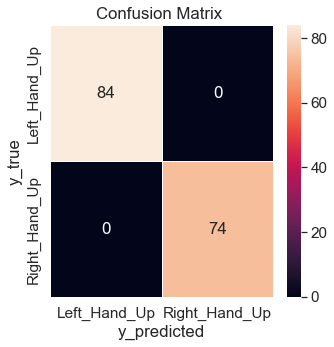

In [93]:
cm_lr = confusion_matrix(y_test,fit_models['lr'].predict(X_test))

# %% confusion matrix visualization
#import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
labels=["Left_Hand_Up","Right_Hand_Up"]
sns.heatmap(cm_lr,xticklabels=labels,yticklabels=labels, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix ")
plt.show()

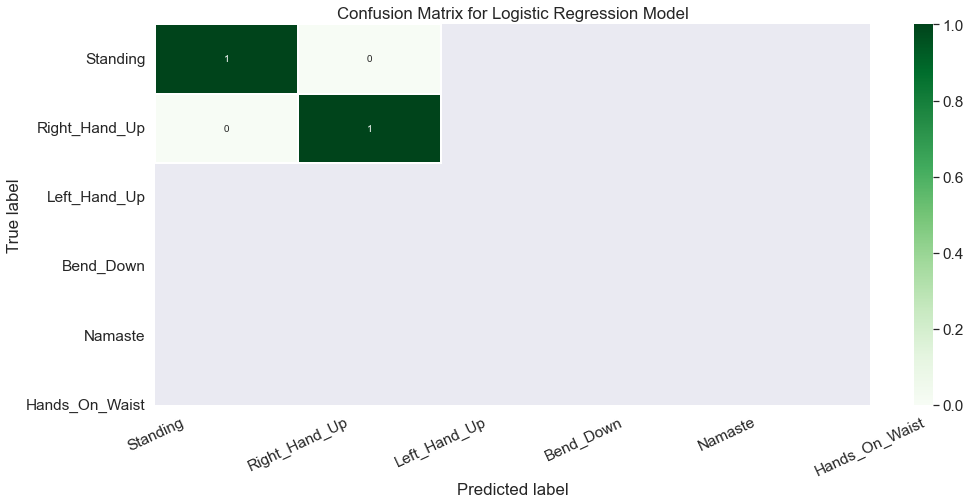

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(y_test,fit_models['lr'].predict(X_test))

# %% confusion matrix visualization
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["Standing","Right_Hand_Up","Left_Hand_Up","Bend_Down","Namaste","Hands_On_Waist"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,fit_models['rc'].predict(X_test)))

                precision    recall  f1-score   support

     Bend_Down       1.00      1.00      1.00        94
Hands_On_Waist       1.00      1.00      1.00       120
  Left_Hand_Up       1.00      1.00      1.00        84
       Namaste       1.00      1.00      1.00       138
 Right_Hand_Up       1.00      0.95      0.97        75
      Standing       0.97      1.00      0.99       140

      accuracy                           0.99       651
     macro avg       1.00      0.99      0.99       651
  weighted avg       0.99      0.99      0.99       651



In [34]:
with open('body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# 4. Make Detections with Model

In [3]:
with open('body_language.pkl', 'rb') as f:
    model = pickle.load(f)

In [4]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [5]:
cap = cv2.VideoCapture('Input_Check3.mp4')
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            row = pose_row
            
#             # Append class name 
#             row.insert(0, class_name)
            
#             # Export to CSV
#             with open('coords.csv', mode='a', newline='') as f:
#                 csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                 csv_writer.writerow(row) 

            # Make Detections
            #print('hello')
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            #print('after')
            # Grab ear coords
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        except Exception as e:
            print("exeption : ",e)
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.04 0.03 0.09 0.01 0.19 0.64]
Standing [0.04 0.03 0.09 0.01 0.19 0.64]
Standing [0.04 0.03 0.08 0.01 0.19 0.65]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.04 0.03 0.07 0.01 0.2  0.65]
Standing [0.04 0.03 0.07 0.01 0.2  0.65]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.04 0.04 0.07 0.01 0.18 0.66]
Standing [0.04 0.04 0.07 0.01 0.18 0.66]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.04 0.04 0.07 0.01 0.17 0.67]
Standing [0.04 0.04 0.07 0.01 0.18 0.66]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.04 0.04 0.07 0.01 0.19 0.65]
Standing [0.04 0.04 0.08 0.01 0.18 0.65]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.04 0.04 0.08 0.01 0.18 0.65]
Standing [0.04 0.04 0.07 0.01 0.18 0.66]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.04 0.05 0.07 0.01 0.18 0.65]
Standing [0.04 0.04 0.07 0.01 0.18 0.66]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.05 0.07 0.01 0.15 0.7 ]
Standing [0.02 0.04 0.08 0.01 0.19 0.66]
Standing [0.02 0.06 0.07 0.01 0.18 0.66]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.08 0.01 0.17 0.66]
Standing [0.02 0.06 0.08 0.01 0.14 0.69]
Standing [0.02 0.06 0.08 0.01 0.14 0.69]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.05 0.09 0.01 0.15 0.68]
Standing [0.02 0.06 0.09 0.01 0.15 0.67]
Standing [0.02 0.06 0.08 0.01 0.17 0.66]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.08 0.01 0.19 0.64]
Standing [0.03 0.06 0.08 0.01 0.19 0.63]
Standing [0.03 0.06 0.08 0.01 0.18 0.64]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.03 0.06 0.09 0.01 0.19 0.62]
Standing [0.03 0.06 0.09 0.01 0.18 0.63]
Standing [0.04 0.06 0.09 0.01 0.16 0.64]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.03 0.05 0.1  0.01 0.19 0.62]
Standing [0.03 0.03 0.11 0.01 0.19 0.63]
Standing [0.03 0.03 0.14 0.01 0.21 0.58]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.02 0.02 0.14 0.01 0.18 0.63]
Standing [0.03 0.02 0.12 0.01 0.18 0.64]
Standing [0.03 0.05 0.14 0.01 0.16 0.61]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.03 0.02 0.13 0.01 0.15 0.66]
Standing [0.03 0.02 0.12 0.01 0.15 0.67]
Standing [0.02 0.02 0.12 0.01 0.18 0.65]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.02 0.11 0.01 0.13 0.71]
Standing [0.01 0.03 0.11 0.   0.1  0.75]
Standing [0.01 0.03 0.1  0.01 0.07 0.78]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.01 0.03 0.1  0.01 0.07 0.78]
Standing [0.01 0.03 0.1  0.01 0.07 0.78]
Standing [0.01 0.03 0.1  0.01 0.02 0.83]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.01 0.03 0.1  0.01 0.02 0.83]
Standing [0.02 0.03 0.1  0.01 0.02 0.82]
Standing [0.02 0.03 0.1  0.01 0.02 0.82]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.03 0.1  0.01 0.02 0.82]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.05 0.1  0.01 0.02 0.8 ]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.02 0.05 0.1  0.01 0.02 0.8 ]
Standing [0.02 0.05 0.1  0.01 0.02 0.8 ]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.01 0.8 ]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.02 0.06 0.1  0.01 0.01 0.8 ]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.02 0.06 0.1  0.01 0.02 0.79]
Standing [0.01 0.06 0.1  0.01 0.02 0.8 ]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.01 0.06 0.1  0.01 0.02 0.8 ]
Standing [0.01 0.06 0.1  0.01 0.02 0.8 ]
Standing [0.01 0.06 0.1  0.01 0.02 0.8 ]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.01 0.06 0.1  0.01 0.02 0.8 ]
Standing [0.01 0.03 0.1  0.01 0.02 0.83]
Standing [0.01 0.03 0.1  0.01 0.02 0.83]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_m

Standing [0.01 0.03 0.1  0.01 0.02 0.83]
Standing [0.01 0.03 0.1  0.01 0.02 0.83]
Standing [0.01 0.03 0.1  0.01 0.01 0.84]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.01 0.03 0.1  0.01 0.01 0.84]
Standing [0.01 0.06 0.1  0.01 0.01 0.81]
Standing [0.01 0.06 0.09 0.01 0.01 0.82]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Standing [0.01 0.06 0.09 0.01 0.01 0.82]
Standing [0.01 0.06 0.09 0.01 0.01 0.82]
Standing [0.02 0.06 0.09 0.01 0.01 0.81]
Standing [0.02 0.06 0.09 0.01 0.02 0.8 ]


C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\neha_marne\Anaconda3\envs\django\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
tuple(np.multiply(np.array((results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)), [640,480]).astype(int))